In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
total = pd.read_csv('total_sub.csv',index_col='Unnamed: 0')
total.sample(6)

,accident_cnt,고령인구_count_100,생산가능인구_count_100,신호등_sum,유동인구_sum,유소년인구_count_100,유소년인구_count_200,주정차_count_300,차량등록_count_200,학원수_count_100,...,학구.raw오산원일초통학구역,학구.raw오산초가수초공동통학구역,학구.raw오산초통학구역,학구.raw운산초통학구역,학구.raw운암초통학구역,학구.raw원동초통학구역,학구.raw필봉초통학구역,학구.raw화성초통학구역,정류장_count_200,총인구_count_100
105,3,9,298,0,35.700167,19,48,3,0,0,...,0,0,0,0,0,0,0,0,2,334
29,2,55,646,4,27.159583,156,333,3,0,1,...,0,0,0,0,0,0,1,0,3,868
227,2,0,564,0,40.046083,0,185,13,0,0,...,1,0,0,0,0,0,0,0,6,573
274,2,118,471,0,55.086833,40,102,10,0,0,...,0,0,0,0,1,0,0,0,2,634
290,3,30,389,0,25.033917,53,426,9,0,0,...,0,0,0,0,0,0,0,0,4,481
226,1,131,998,0,19.388583,188,708,8,0,0,...,1,0,0,0,0,0,0,0,4,1317


In [23]:
total.columns

Index(['accident_cnt', '고령인구_count_100', '생산가능인구_count_100', '신호등_sum',
       '유동인구_sum', '유소년인구_count_100', '유소년인구_count_200', '주정차_count_300',
       '차량등록_count_200', '학원수_count_100', '학원수_count_300', '횡단보도_sum',
       '방지턱_count', '방지턱_count_100', '방지턱_count_200', '불법주정차_cam_count',
       '어린이집_count', '어린이집_count_100', '어린이집_count_200', '유치원_count',
       '유치원_count_100', '유치원_count_200', '정류장_count_100', '정류장_count_300',
       '초등학교_count', '초등학교_count_100', '초등학교_count_200', '동.raw가수동',
       '동.raw가장동', '동.raw갈곶동', '동.raw고현동', '동.raw궐동', '동.raw금암동', '동.raw내삼미동',
       '동.raw누읍동', '동.raw벌음동', '동.raw부산동', '동.raw서동', '동.raw서랑동', '동.raw세교동',
       '동.raw수청동', '동.raw양산동', '동.raw오산동', '동.raw외삼미동', '동.raw원동', '동.raw은계동',
       '동.raw지곶동', '동.raw청학동', '동.raw청호동', '동.raw탑동', '학구.raw가수초통학구역',
       '학구.raw광성초양산초병점초공동통학구역', '학구.raw광성초통학구역', '학구.raw금암초통학구역',
       '학구.raw대호초성산초공동통학구역', '학구.raw대호초통학구역', '학구.raw매홀초삼미분교수청초필봉초공동통학구역',
       '학구.raw매홀초삼미분교장통학구역', '학구.raw매홀초통학구역', '학

In [24]:
'''
X = pd.DataFrame(total.drop(['gid','geometry','가장동','갈곶동','고현동','궐동','금암동','내삼미동','부산동','누읍동','벌음동','부산동','서동','서랑동',
                                '세교동','수청동','양산동','오산동','외삼미동','원동','은계동','지곶동','청학동','청호동','탑동',
                                '광성초양산초병점초공동통학구역','광성초통학구역','금암초통학구역','대호초성산초공동통학구역',
                                '대호초통학구역','매홀초삼미분교수청초필봉초공동통학구역','매홀초삼미분교장통학구역','매홀초통학구역',
                                '문시초통학구역','성산초통학구역','성호초운암초공동통학구역','성호초통학구역','세미초통학구역','수청초통학구역',
                                '양산초통학구역', '오산고현초오산원당초공동통학구역','오산고현초통학구역','오산대원초원동초공동통학구역','오산대원초통학구역',
                                '오산원당초통학구역','오산원일초통학구역','오산초가수초공동통학구역','오산초통학구역','운산초통학구역','운암초통학구역',
                                '원동초통학구역','필봉초통학구역','화성초통학구역'],axis=1))
'''
X = pd.DataFrame(total.drop(['accident_cnt'],axis=1))
cols = X.columns
Y = pd.Series(total["accident_cnt"])
X.shape , Y.shape

((345, 80), (345,))

### - split validation set

In [25]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
m_scaler = MinMaxScaler()
X = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train.shape , x_test.shape

((276, 80), (69, 80))

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import cross_val_score

In [27]:
my_scorer = make_scorer(mean_squared_error,greater_is_better=False)

kf = KFold(n_splits=10,shuffle=True,random_state=2021)

## Fitting AdaBoost Model

In [28]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200,learning_rate=0.1,loss="linear",random_state=2021)
ada.fit(x_train, y_train)

Rscore = ada.score(x_test,y_test)
score = cross_val_score(ada,x_test,y_test,cv=kf,scoring=my_scorer)  
print("MSE :",score.mean()*(-1))

MSE : 1.6879810655301675


In [29]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200,learning_rate=0.1,loss="exponential",random_state=2021)
ada.fit(x_train, y_train)

Rscore = ada.score(x_test,y_test)
score = cross_val_score(ada,x_test,y_test,cv=kf,scoring=my_scorer)  
print("MSE :",score.mean()*(-1))

MSE : 1.6497969970476276


## Fitting XGBoost Model

In [30]:
import xgboost
xgb_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(x_train,y_train)

Rscore = xgb_model.score(x_test,y_test)
score = cross_val_score(xgb_model,x_test,y_test,cv=kf,scoring=my_scorer)  
print("MSE :",score.mean()*(-1))

MSE : 1.511308975400972


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

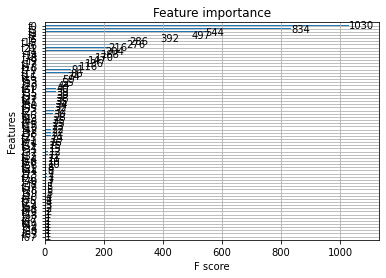

In [31]:
import matplotlib.pyplot as plt
xgboost.plot_importance(xgb_model)

### 전체 모델들의 MSE 시각화

In [32]:
data = [['Linear Regression',1.0499],['Ridge Regression',0.97336],['Lasso Regression', 0.94607],['Eleastic Regerssion',0.88615],
       ['SVM -linear',1.4186], ['SVM-radial',1.33959],['Regression Tree',0.99607],['Random Forest',0.98421],['Gradient Boosting',1.0391],
       ['AdaBoost',1.63523],['XGBoost', 1.77282]]

In [33]:
df = pd.DataFrame(data,columns=['Model','MSE'])

In [34]:
df

,Model,MSE
0,Linear Regression,1.04990
1,Ridge Regression,0.97336
2,Lasso Regression,0.94607
3,Eleastic Regerssion,0.88615
4,SVM -linear,1.41860
5,SVM-radial,1.33959
6,Regression Tree,0.99607
7,Random Forest,0.98421
8,Gradient Boosting,1.03910
9,AdaBoost,1.63523


In [35]:
import matplotlib.pyplot as plt

In [36]:
df2 = df.sort_values(by='MSE',axis=0,ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

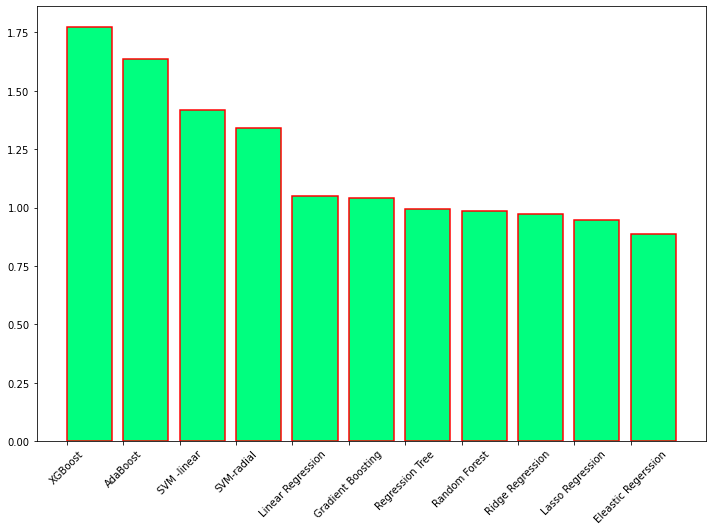

In [37]:
plt.figure(figsize=(12,8))
plt.bar(df2.Model,df2.MSE, align='edge', color='springgreen',edgecolor="red", linewidth=1.5)
plt.xticks(rotation = 45)